<center>
<h1><b>Lab 10</b></h1>
<h1>PHYS 580 - Computational Physics</h1>
<h2>Professor Molnar</h2>
</br>
<h3><b>Ethan Knox</b></h3>
<h4>https://www.github.com/ethank5149</h4>
<h4>ethank5149@gmail.com</h4>
</br>
</br>
<h3><b>November 5, 2020</b></h3>
<hr>
</center>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import display, Math
from scipy.optimize import curve_fit

In [14]:
%run percolate.py

In [15]:
linfit = lambda x, a, b : a + b * x

# Problem 1
First, set the site occupation probability to $p=0.593$ (very close the percolation threshold $p_c$ for a 2D lattice), and study percolation on lattices of several different sizes ranging from $L\times L=50\times50$ through $1000\times1000$ or so. Generate at least $20$ realizations for each lattice size, and for each percolation record the _percolation probability_ $P(p_c)$ and the _susceptibility_ $\chi(p_c)$ (up to a multiplicative factor, the latter is just the mean cluster size). Then, average $P$ and $\chi$ over the set of realizations, and determine how the averaged $P(p_c)$ and $\chi(p_c)$ depend on the lattice edge size $L$ for asymptotically large $L$. This dependence is called _finite-size_ scaling (you should find power-law behavior). Estimate the power-law exponents by linear least-squares fitting on log-log scale. 

Theoretically, the expected asymptotic behaviors are $$P(p_c)\sim L^{−\beta/\nu},\quad \chi(p_c)\sim L^{\gamma/\nu}$$

$$P\propto L^{−\beta/\nu},\quad \chi\propto L^{\gamma/\nu}$$
$$\Downarrow$$
$$\ln\left(P\right)\sim a_{P(L)}-\frac{\beta}{\nu}\ln\left(L\right),\quad \ln\left(\chi\right)\sim a_{\chi(L)}+\frac{\gamma}{\nu}\ln\left(L\right)$$

In [16]:
P0 = 0.593
Nsamples = 200
minlength = 50
maxlength = 150

In [17]:
L = np.arange(maxlength, minlength, -1)
data = np.zeros((2, L.size))

for i, l in enumerate(tqdm(L)):
    _p, _chi = percolate_ensemble(P0, l, Nsamples)
    p = np.mean(_p)
    chi = np.mean(_chi)
    data[:, i] = np.array([p, chi])

100%|██████████| 100/100 [14:39<00:00,  8.80s/it]


In [18]:
(a_pl, c), _ = curve_fit(linfit, L, np.log(data[0, :]))
beta_nu = -c

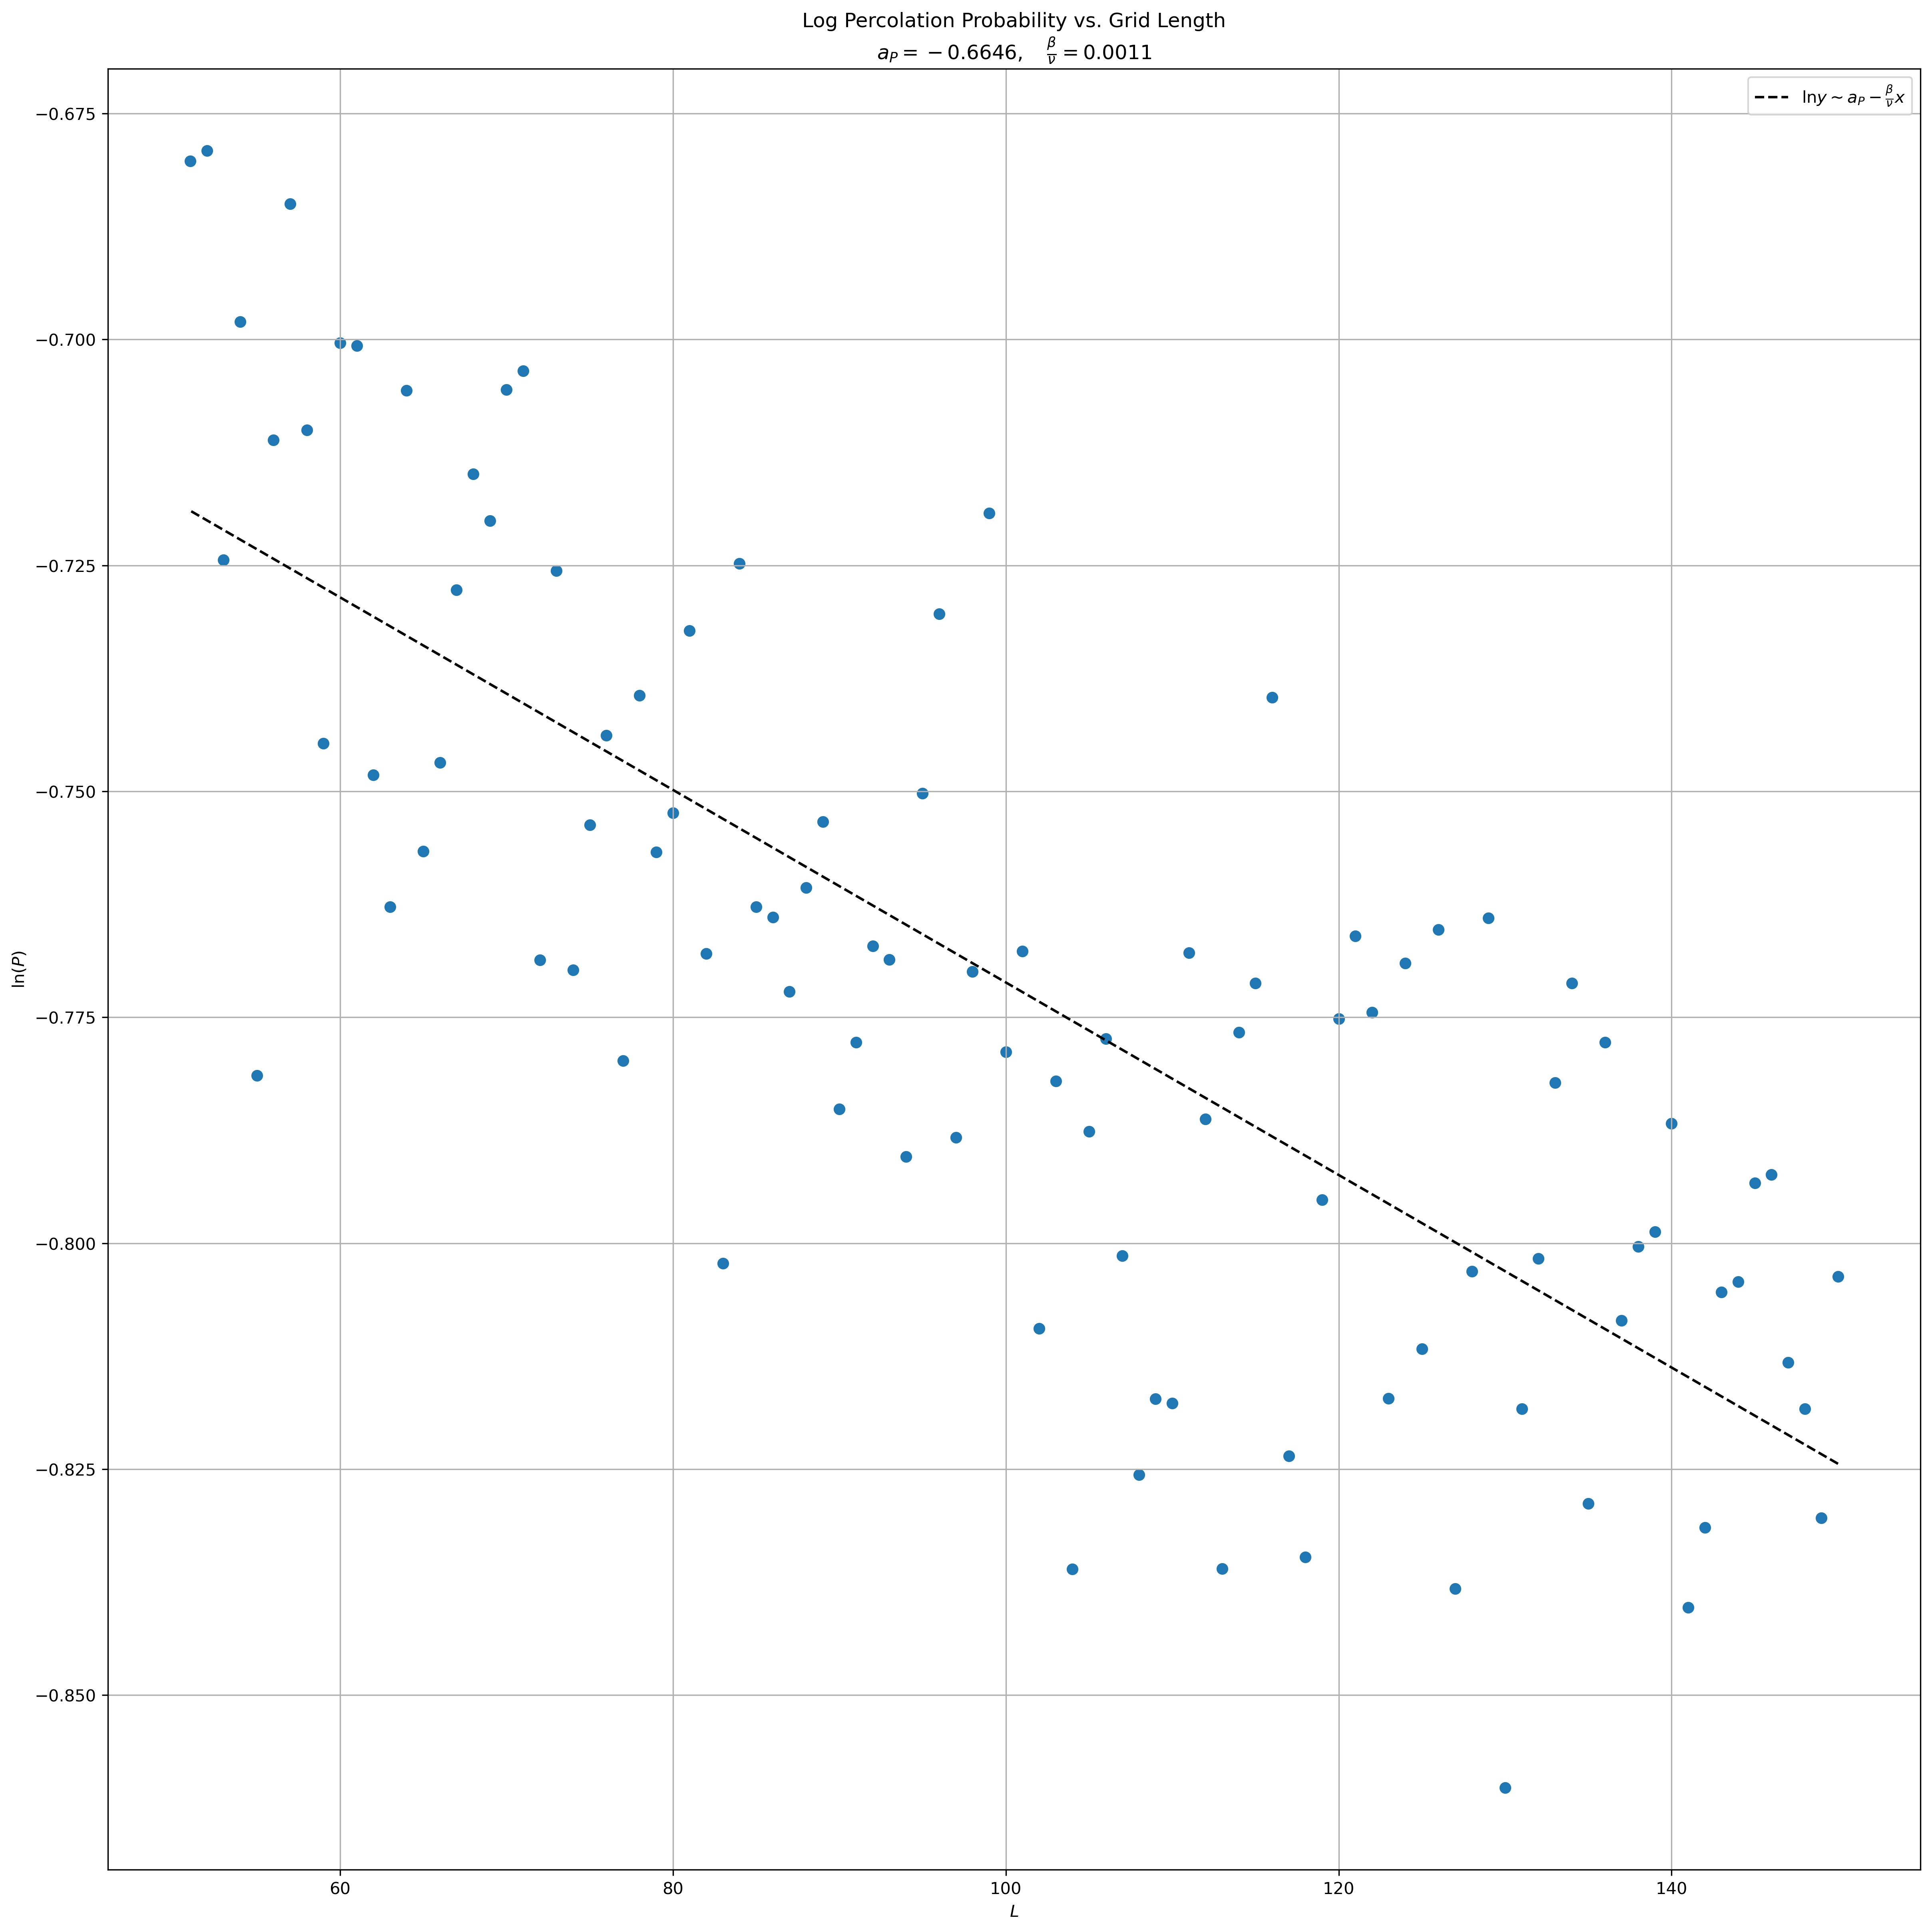

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=300,constrained_layout=True)
ax.scatter(L, np.log(data[0, :]))
ax.plot(L, linfit(L, a_pl, c), c='k', ls='dashed', label=r'$\ln{y}\sim a_P-\frac{\beta}{\nu}x$')
ax.set_title('Log Percolation Probability vs. Grid Length\n'+fr"$a_P={a_pl:0.4f},\quad\frac{{\beta}}{{\nu}}={beta_nu:0.4f}$")
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\ln\left(P\right)$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem1_P_plot')

In [20]:
(a_cl, gamma_nu), _ = curve_fit(linfit, L, np.log(data[1, :]))

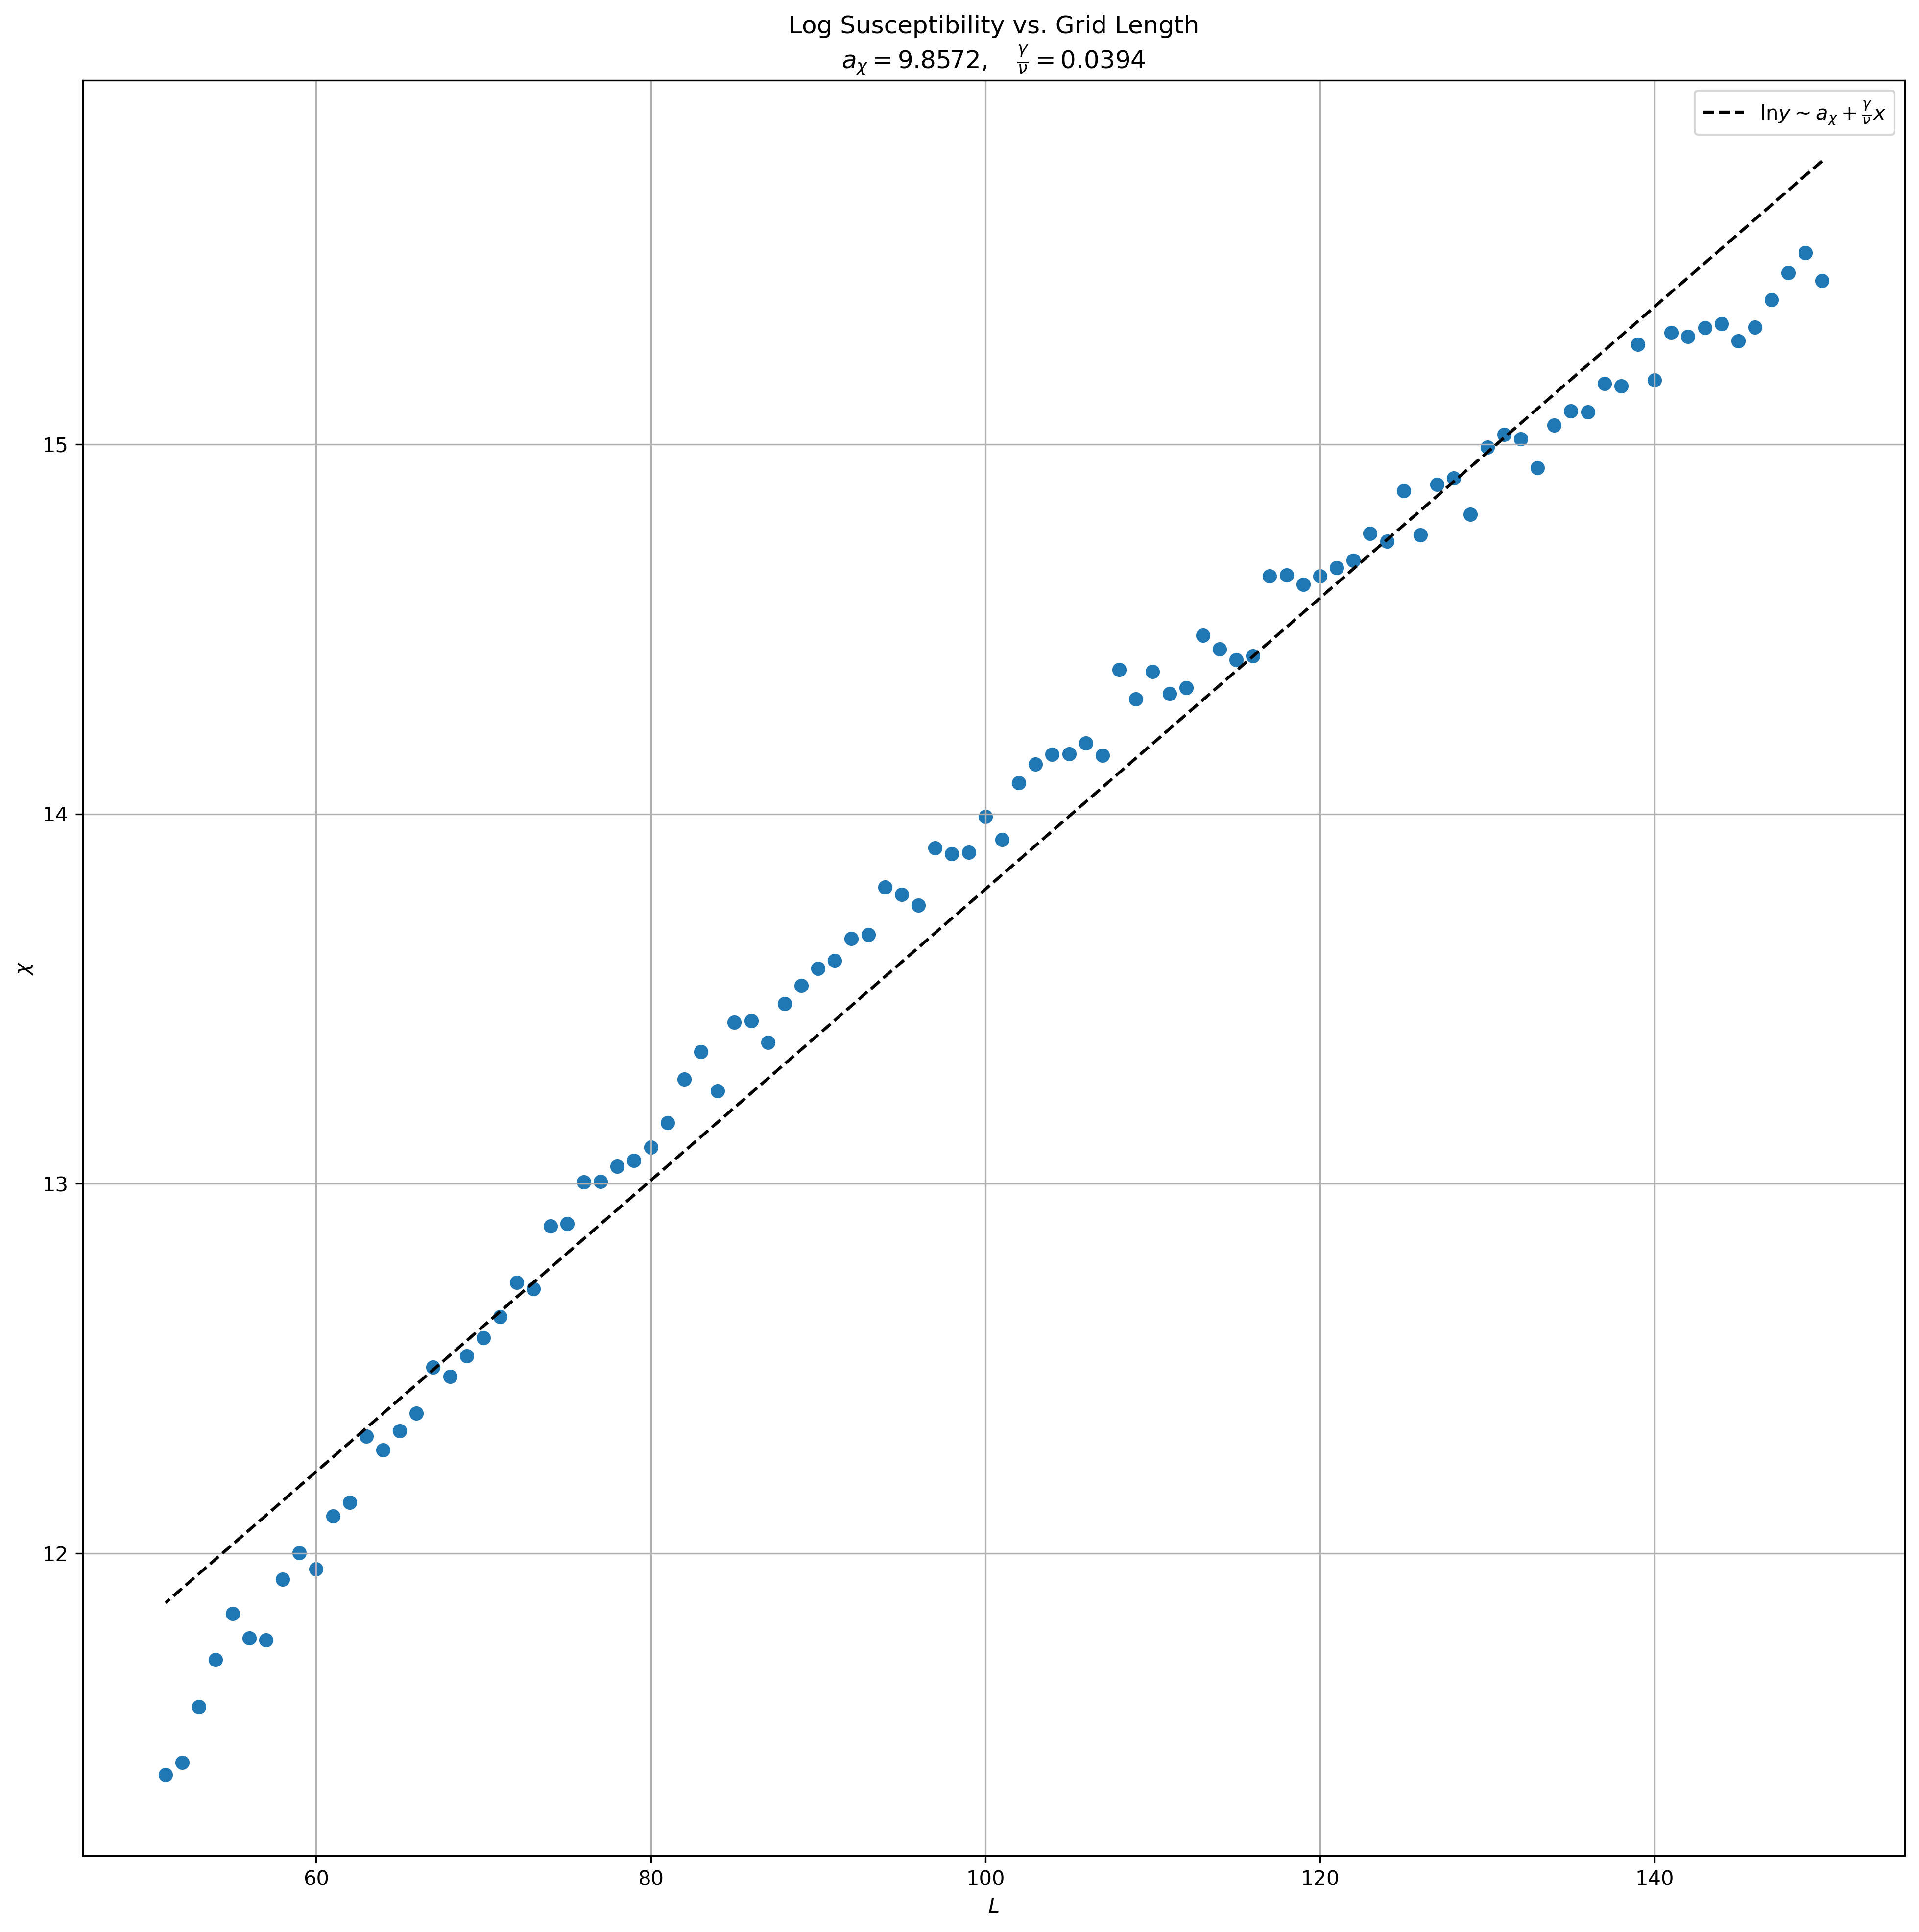

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=300)
ax.scatter(L, np.log(data[1, :]))
ax.plot(L, linfit(L, a_cl, gamma_nu), c='k', ls='dashed', label=r'$\ln{y}\sim a_{\chi}+\frac{\gamma}{\nu}x$')
ax.set_title('Log Susceptibility vs. Grid Length\n'+fr"$a_{{\chi}}={a_cl:0.4f},\quad\frac{{\gamma}}{{\nu}}={gamma_nu:0.4f}$")
ax.set_xlabel(r'$L$')
ax.set_ylabel(r'$\chi$')
ax.legend()
ax.grid()
plt.savefig('plots/Problem1_chi_plot')

In [22]:
beta_gamma = beta_nu / gamma_nu
display(Math(fr'\frac{{\beta}}{{\gamma}}=\frac{{\beta/\nu}}{{\gamma/\nu}}=\frac{{{beta_nu:0.6f}}}{{{gamma_nu:0.6f}}}={beta_gamma:0.6f}'))

<IPython.core.display.Math object>

# Problem 2
Next, generate percolation realizations for at least $10$ different values of $p$ around $p_c$ on large lattices of fixed given size $L\times L$. Plot $P(p)$ and $\chi(p)$ (averaged over at least $20$ realizations at each $p$) as a function of $p$, and show that for sufficiently large $L$ these two quantities behave as power laws near (but not too near!) $p=p_c$. Specifically, $P(p)\sim\left(p-p_c\right)^{\beta}$ for $p>p_c$, and $\chi(p)\sim\left|p−p_c\right|^{-\gamma}$ on both sides of $p_c$. From your numerical data, estimate the critical exponents $\beta$ and $\gamma$. Combine the results with your findings from part (1) to estimate $\nu$ as well.

$$P\propto\left(p-p_c\right)^{\beta},\quad\chi\propto\left|p−p_c\right|^{-\gamma}$$
$$\Downarrow$$
$$\ln\left(P\right)\sim a_{P(p)}+\beta\ln\left(p-p_c\right),\quad\ln\left(\chi\right)\sim a_{\chi(p)}-\gamma\ln\left|p−p_c\right|$$

In [23]:
P0 = 0.593
Nsamples = 50
num_p = 250
deltap = 0.5
L = 100

In [24]:
P = P0 + deltap * np.linspace(-0.2, 0.0, num_p)
data = np.zeros((2,P.size))

for i, p in enumerate(tqdm(P)):
    _p, _chi = percolate_ensemble(p, L, Nsamples)
    p = np.mean(_p)
    chi = np.mean(_chi)
    data[:,i] = np.array([p, chi])
np.save('Problem2_data_a', data)

100%|██████████| 250/250 [08:38<00:00,  2.07s/it]


In [25]:
(a_pp, beta), _ = curve_fit(linfit, P, np.log(data[0, :]))

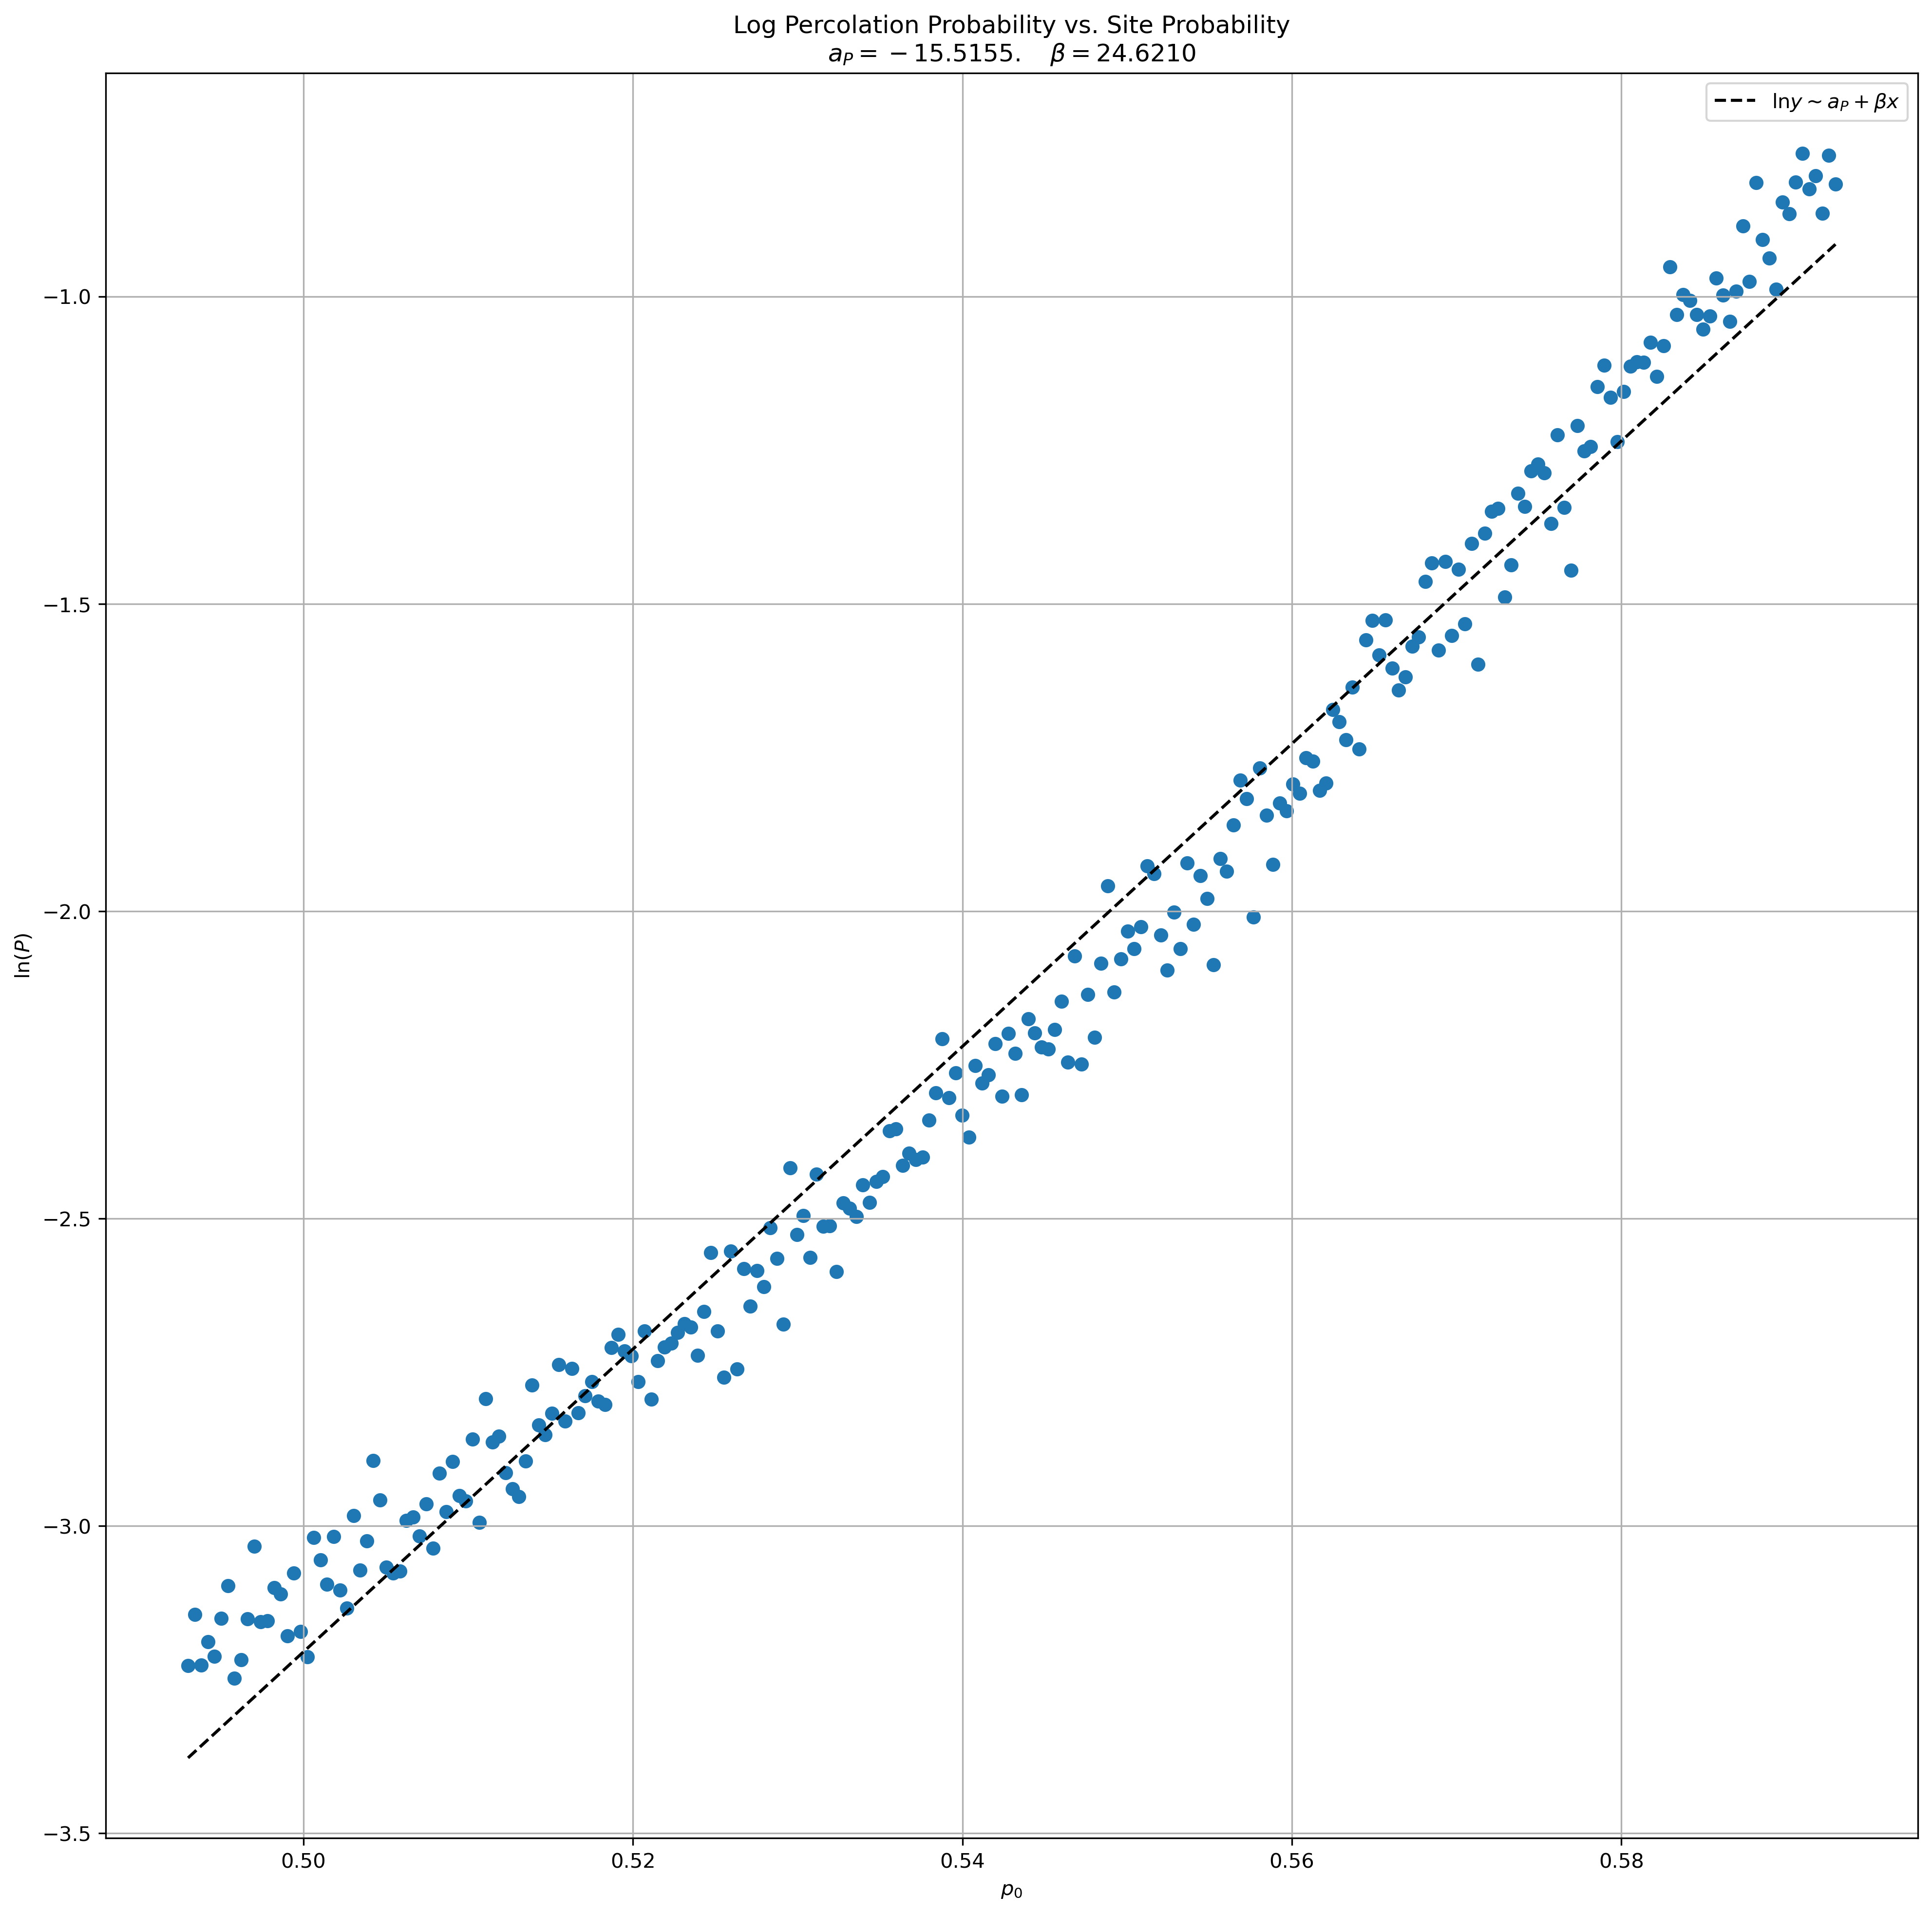

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=300)
ax.scatter(P, np.log(data[0, :]))
ax.plot(P, linfit(P, a_pp, beta), c='k', ls='dashed', label=r'$\ln{y}\sim a_P+\beta x$')
ax.set_title('Log Percolation Probability vs. Site Probability\n'+fr"$a_P={a_pp:0.4f}.\quad\beta={beta:0.4f}$")
ax.set_xlabel(r'$p_0$')
ax.set_ylabel(r'$\ln\left(P\right)$')
ax.grid()
ax.legend()
plt.savefig('plots/Problem2_P_plot')

In [27]:
P = P0 + deltap * np.linspace(-0.3, 0.3, num_p)
data = np.zeros((2,P.size))

for i, p in enumerate(tqdm(P)):
    _p, _chi = percolate_ensemble(p, L, Nsamples)
    p = np.mean(_p)
    chi = np.mean(_chi)
    data[:,i] = np.array([p, chi])
np.save('Problem2_data_b', data)

100%|██████████| 250/250 [08:22<00:00,  2.01s/it]


In [28]:
P1, P2 = np.hsplit(P, 2)
data1, data2 = np.hsplit(data, 2)

(a_cpl, cl), _ = curve_fit(linfit, P1, np.log(data1[1, :]))
(a_cpr, cr), _ = curve_fit(linfit, P2, np.log(data2[1, :]))
gamma = -cl

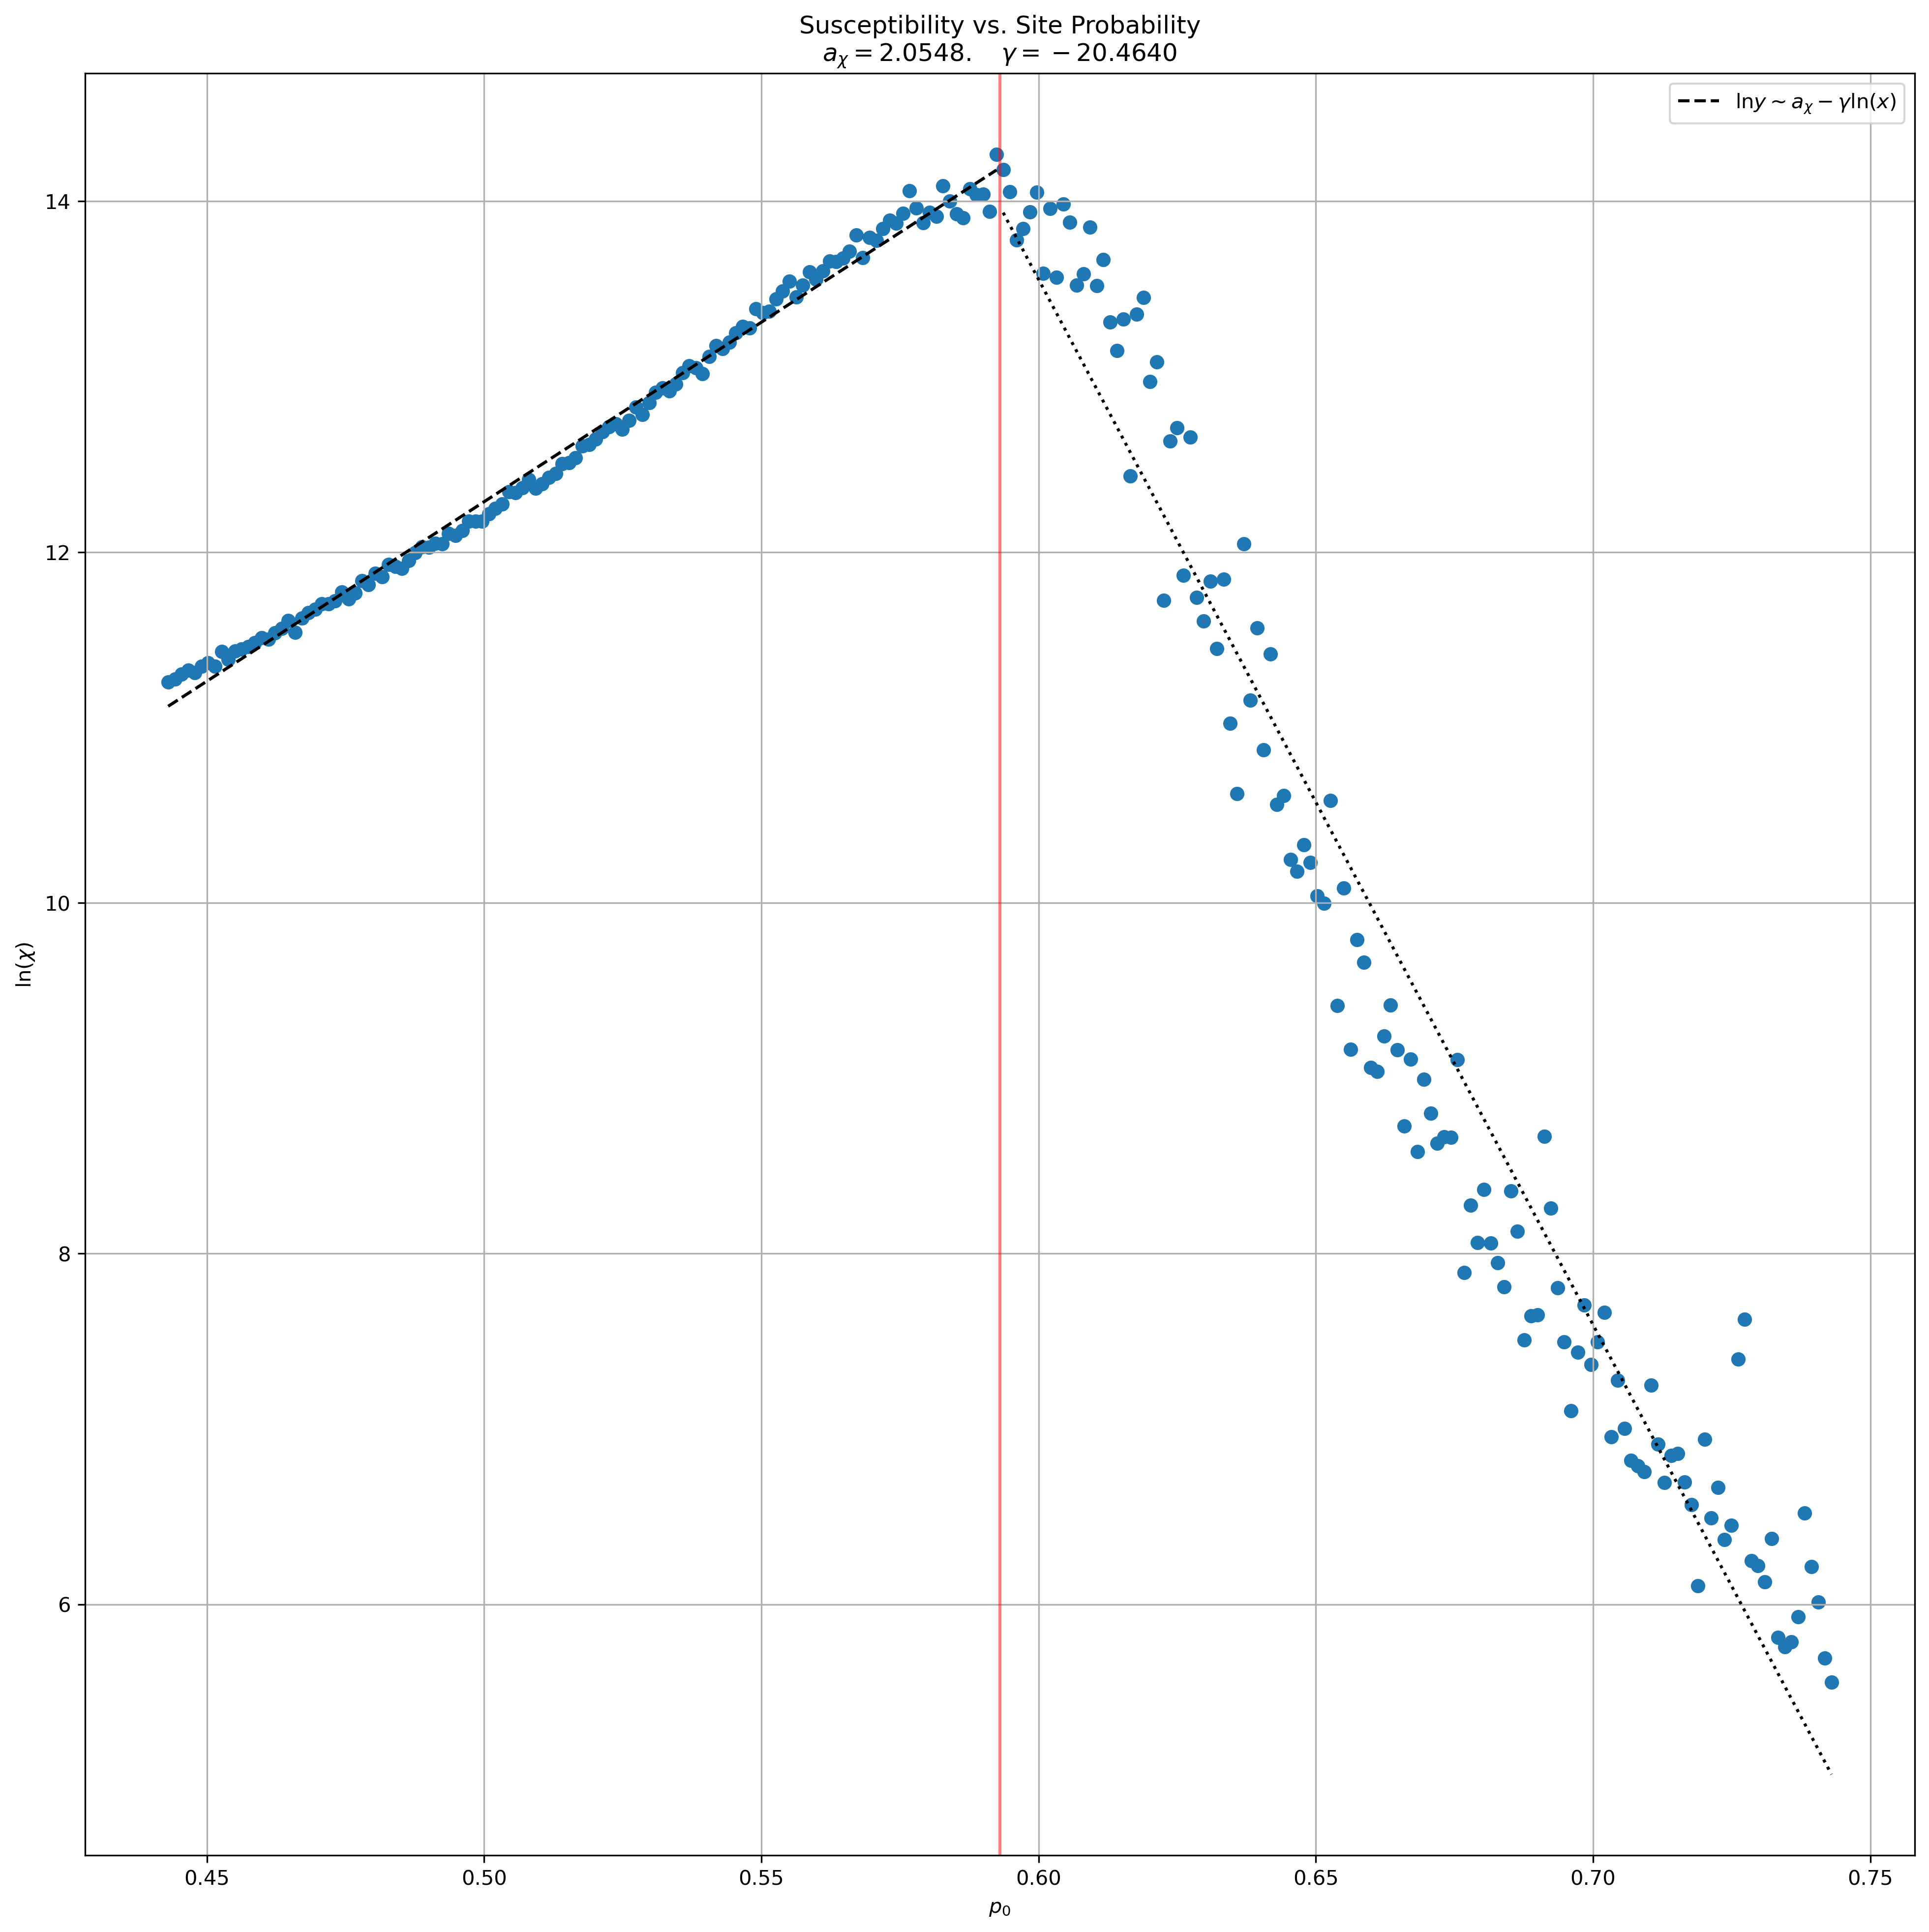

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi=300)
ax.scatter(P, np.log(data[1, :]))
ax.plot(P1, linfit(P1, a_cpl, cl), c='k', ls='dashed', label=r'$\ln{y}\sim a_{\chi}-\gamma\ln\left(x\right)$')
ax.plot(P2, linfit(P2, a_cpr, cr), c='k', ls='dotted')
ax.axvline(P0, alpha=0.5, c='red')
ax.set_title('Susceptibility vs. Site Probability\n'+fr"$a_{{\chi}}={a_cpl:0.4f}.\quad\gamma={gamma:0.4f}$")
ax.set_xlabel(r'$p_0$')
ax.set_ylabel(r'$\ln\left(\chi\right)$')
ax.grid()
ax.legend()
plt.savefig('plots/Problem2_chi_plot')

In [30]:
display(Math(fr'\nu={beta/beta_nu}'))
display(Math(fr'\nu={gamma/gamma_nu}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>